In [1]:
import vwf.VWF_Model as model
import time
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
country = "DK"
time_res = 'two_month' #  the options are: 'year', 'season', 'two_month', 'month'
num_clu = 10 # the higher the number of clusters the longer training will take

year_star = 2016 # start year of training period
year_end = 2019 # end year of training period
test_year = 2020 # year you wish to receive a time series for

vwf_model = model.VWF(country, year_star, year_end, test_year)
vwf_model.prep()

vwf_model.train(num_clu)

Training on  10  clusters.
Training parameters completed and saved. Elapsed time: 51.38 seconds
 


In [3]:
vwf_model.test(time_res)

Test for  2020  using  10  clusters with time resolution:  two_month  is taking place.
Results completed and saved. Elapsed time: 0.02 seconds
 


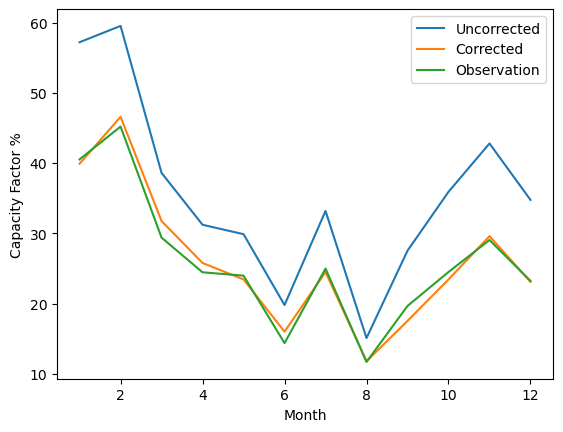

In [4]:
unc = pd.read_csv('data/results/raw/'+str(test_year)+'_unc_cf.csv', parse_dates=['time'])
corr = pd.read_csv('data/results/raw/'+str(test_year)+'_'+time_res+'_'+str(num_clu)+'_cor_cf.csv', parse_dates=['time'])
obs = pd.read_csv('data/results/denmark_obs_cf.csv', parse_dates=['time'])

unc_month = unc.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
corr_month = corr.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values
obs_month = obs.groupby(pd.Grouper(key='time',freq='M')).mean().transpose().mean().values

plt.plot(range(1,13), unc_month*100, label='Uncorrected')
plt.plot(range(1,13), corr_month*100, label='Corrected')
plt.plot(range(1,13), obs_month*100, label='Observation')

plt.xlabel('Month')
plt.ylabel('Capacity Factor %')
plt.legend();